# HW2 - ES18BTECH11016


In [138]:
# Imports
from matplotlib import pyplot as plt, image as mpimg
import numpy as np
from copy import deepcopy
import math


## 1. Binary Morphology


### 1.1 Dilate, Erode, Median


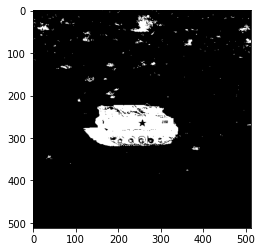

In [139]:
APC = mpimg.imread("APC.tiff")


def binarize(img: np.ndarray, threshold: int) -> np.ndarray:
    imgCopy = deepcopy(img)
    for (i, row) in enumerate(imgCopy):
        for (j, pixel) in enumerate(row):
            if pixel < threshold:
                imgCopy[i][j] = 255
            else:
                imgCopy[i][j] = 0
    return imgCopy


def complementImage(img: np.ndarray):
    imgCopy = deepcopy(img)
    for (i, row) in enumerate(imgCopy):
        for (j, _) in enumerate(row):
            imgCopy[i][j] = 255 - imgCopy[i][j]
    return imgCopy


binarizedAPC = binarize(APC, 80)
plt.imshow(binarizedAPC, cmap="gray")


- We need a binarized image to perform morphology operations. I chose APC as the image.


#### 1.1.1 Dilate

Shapes of the window as follws

```plaintext
 --------------    ---
|              |    |
|              |    |
|    square    |  (size)
|              |    |
|              |    |
 --------------    ---
      #               ---
     ###               |
    #####              |
   ####### Cross     (size)
    #####              |
     ###               |
      #               ---
```


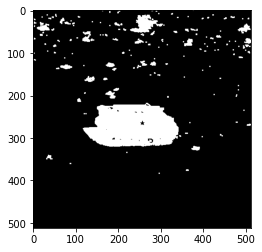

In [140]:
def DilateBinaryImage(img: list[list[int]], window, shape: str):
    window = int(
        window / 2
    )  # Given window is the side. We take the center of the window. So we need distance from the center to the edge.
    imgCopy = deepcopy(img)
    for i in range(window, img.shape[0] - window):
        for j in range(window, img.shape[1] - window):
            if img[i, j] == 0:  # If the pixel is black
                isWhite: bool = False
                if shape == "square":  # Search surrounding square for any whites
                    isWhite = img[
                        i - window : i + window + 1, j - window : j + window + 1
                    ].any()
                elif shape == "cross":  # Search surrounding cross for any whites
                    for ik in range(window):
                        for jk in range(window):
                            if (abs(ik + jk) < window) and (
                                img[i - ik, j - jk] == 255
                                or img[i + ik, j + jk] == 255
                                or img[i + ik, j - jk] == 255
                                or img[i - ik, j + jk] == 255
                            ):
                                isWhite = True
                                break
                if isWhite:
                    imgCopy[i, j] = 255  # If white is found, we dilate
                else:
                    imgCopy[i, j] = 0
    return imgCopy


plt.imshow(
    DilateBinaryImage(binarizedAPC, 3, "square"), cmap="gray"
)  # Dilate Square(3)


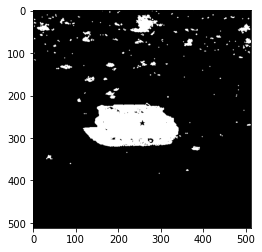

In [141]:
plt.imshow(DilateBinaryImage(binarizedAPC, 5, "cross"), cmap="gray") # Dilate Cross(5)


#### 1.1.2 Erode


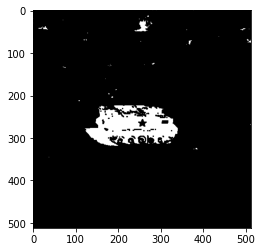

In [142]:
# Similarly for Eroding a binary image
def ErodeBinaryImage(img: list[list[int]], window, shape: str):
    window = int(window / 2)
    imgCopy = deepcopy(img)
    for i in range(window, img.shape[0] - window):
        for j in range(window, img.shape[1] - window):
            if img[i, j] == 255:
                isBlack: bool = False
                if shape == "square":
                    isBlack = not img[
                        i - window : i + window + 1, j - window : j + window + 1
                    ].all()
                elif shape == "cross":
                    for ik in range(window):
                        for jk in range(window):
                            if (abs(ik + jk) < window) and (
                                img[i - ik, j - jk] == 0
                                or img[i + ik, j + jk] == 0
                                or img[i + ik, j - jk] == 0
                                or img[i - ik, j + jk] == 0
                            ):
                                isBlack = True
                                break
                if isBlack:
                    imgCopy[i, j] = 0
                else:
                    imgCopy[i, j] = 255
    return imgCopy


plt.imshow(ErodeBinaryImage(binarizedAPC, 3, "square"), cmap="gray")


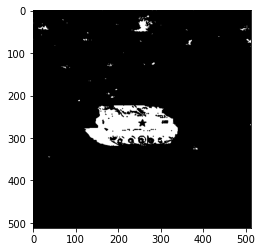

In [143]:
plt.imshow(ErodeBinaryImage(binarizedAPC, 5, "cross"), cmap="gray")


#### 1.1.3 Median


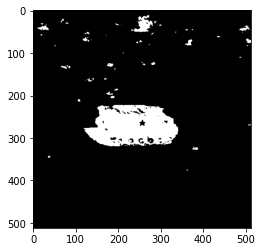

In [144]:
# Similarly for Median
def MedianBinaryImage(img: list[list[int]], window, shape: str):
    window = int(window / 2)
    imgCopy = deepcopy(img)
    for i in range(window, img.shape[0] - window):
        for j in range(window, img.shape[1] - window):
            if True:
                whiteDiff = 0
                if shape == "square":
                    for ik in range(i - window, i + window + 1):
                        for jk in range(j - window, j + window + 1):
                            if img[ik, jk] == 255:
                                whiteDiff += 1
                            else:
                                whiteDiff -= 1
                elif shape == "cross":
                    for ik in range(window):
                        for jk in range(window):
                            if ik + jk < window + 1:
                                if img[i - ik, j - jk] == 0:
                                    whiteDiff -= 1
                                else:
                                    whiteDiff += 1
                                if img[i + ik, j + jk] == 0:
                                    whiteDiff -= 1
                                else:
                                    whiteDiff += 1
                                if img[i + ik, j - jk] == 0:
                                    whiteDiff -= 1
                                else:
                                    whiteDiff += 1
                                if img[i - ik, j + jk] == 0:
                                    whiteDiff -= 1
                                else:
                                    whiteDiff += 1
                if whiteDiff < 0:
                    imgCopy[i, j] = 0
                elif whiteDiff > 0:
                    imgCopy[i, j] = 255
    return imgCopy


plt.imshow(MedianBinaryImage(binarizedAPC, 3, "square"), cmap="gray")


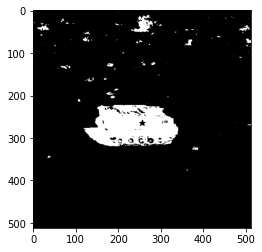

In [145]:
plt.imshow(MedianBinaryImage(binarizedAPC, 5, "cross"), cmap="gray")


### 1.2 Verify Duals


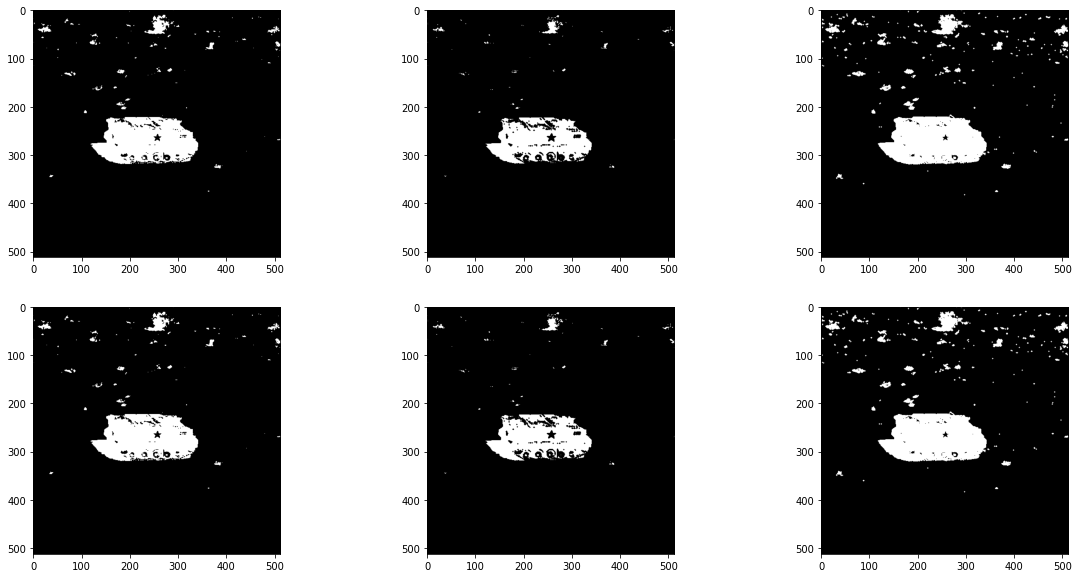

In [146]:
f, axarr = plt.subplots(2, 3, figsize=(20, 10))
axarr[0, 0].imshow(
    complementImage(MedianBinaryImage(complementImage(binarizedAPC), 5, "cross")),
    cmap="gray",
)
axarr[1, 0].imshow(MedianBinaryImage(binarizedAPC, 5, "cross"), cmap="gray")
axarr[0, 1].imshow(
    complementImage(DilateBinaryImage(complementImage(binarizedAPC), 5, "cross")),
    cmap="gray",
)
axarr[1, 1].imshow(ErodeBinaryImage(binarizedAPC, 5, "cross"), cmap="gray")
axarr[0, 2].imshow(
    complementImage(ErodeBinaryImage(complementImage(binarizedAPC), 5, "cross")),
    cmap="gray",
)
axarr[1, 2].imshow(DilateBinaryImage(binarizedAPC, 5, "cross"), cmap="gray")


- Above, we can observe the images are identical.


In [147]:
# Proving that the images are indeed identical by hard comparing them
print(
    str(complementImage(MedianBinaryImage(complementImage(binarizedAPC), 5, "cross")))
    == str(MedianBinaryImage(binarizedAPC, 5, "cross"))
)
print(
    str(complementImage(DilateBinaryImage(complementImage(binarizedAPC), 5, "cross")))
    == str(ErodeBinaryImage(binarizedAPC, 5, "cross"))
)
print(
    str(complementImage(ErodeBinaryImage(complementImage(binarizedAPC), 5, "cross")))
    == str(DilateBinaryImage(binarizedAPC, 5, "cross"))
)


True
True
True


### 1.3 Open, Close


Open = Erode + Dilate
Close = Dilate + Erode


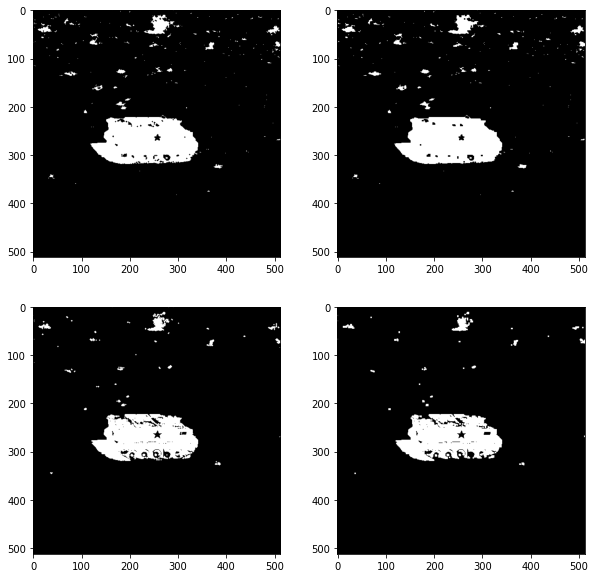

In [148]:
# Opening and Closing is just the same as `Eroding and Dilating` and `Dilating and Eroding`
def OpenImage(img: list[list[int]], window: int, shape: str):
    return ErodeBinaryImage(DilateBinaryImage(img, window, shape), window, shape)


def CloseImage(img: list[list[int]], window: int, shape: str):
    return DilateBinaryImage(ErodeBinaryImage(img, window, shape), window, shape)


f, axarr = plt.subplots(2, 2, figsize=(10, 10))
axarr[0, 0].imshow(OpenImage(binarizedAPC, 5, "cross"), cmap="gray")
axarr[1, 0].imshow(CloseImage(binarizedAPC, 5, "cross"), cmap="gray")
axarr[0, 1].imshow(OpenImage(binarizedAPC, 3, "square"), cmap="gray")
axarr[1, 1].imshow(CloseImage(binarizedAPC, 3, "square"), cmap="gray")


### 1.4 Open-Clos, Clos-Open


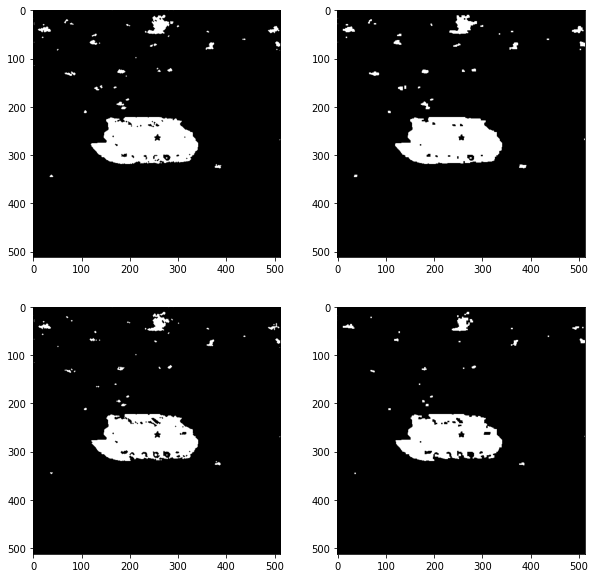

In [149]:
# OpenClose is just the same as `Opening and Closing` and CloseOpen is just the same as `Closing and Opening`
def OpenClosImage(img: list[list[int]], window: int, shape: str):
    return CloseImage(OpenImage(img, window, shape), window, shape)


def ClosOpenImage(img: list[list[int]], window: int, shape: str):
    return OpenImage(CloseImage(img, window, shape), window, shape)


f, axarr = plt.subplots(2, 2, figsize=(10, 10))
axarr[0, 0].imshow(OpenClosImage(binarizedAPC, 5, "cross"), cmap="gray")
axarr[1, 0].imshow(ClosOpenImage(binarizedAPC, 5, "cross"), cmap="gray")
axarr[0, 1].imshow(OpenClosImage(binarizedAPC, 3, "square"), cmap="gray")
axarr[1, 1].imshow(ClosOpenImage(binarizedAPC, 3, "square"), cmap="gray")


### 1.5 Count pixels in the object of interest in APC


In [150]:
# Get APC blob
# To count the pixels in the blob, we need to get the binary image of just the blob
# I am using the same code as in the previous assignment to get the tank's blob


def connectedComponents(img):
    components = []
    visited = [[False for _ in row] for row in img]
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            if pixel == 255 and not visited[i][j]:
                component = []
                queue = [(i, j)]
                while len(queue) > 0:
                    (i, j) = queue.pop()
                    visited[i][j] = True
                    component.append((i, j))
                    if i > 0 and img[i - 1][j] == 255 and not visited[i - 1][j]:
                        queue.append((i - 1, j))
                    if (
                        i < len(img) - 1
                        and img[i + 1][j] == 255
                        and not visited[i + 1][j]
                    ):
                        queue.append((i + 1, j))
                    if j > 0 and img[i][j - 1] == 255 and not visited[i][j - 1]:
                        queue.append((i, j - 1))
                    if (
                        j < len(img[0]) - 1
                        and img[i][j + 1] == 255
                        and not visited[i][j + 1]
                    ):
                        queue.append((i, j + 1))
                components.append(component)
    return components


def maxBlob(img):
    max_size = 0
    max_component = None
    components = connectedComponents(img)
    for component in components:
        size = len(component)
        if size > max_size:
            max_size = size
            max_component = component
    return max_component


def minorBlobRemoval(img):
    r = deepcopy(img)
    for (i, row) in enumerate(img):
        for (j, _) in enumerate(row):
            r[i][j] = 0
    max_component = maxBlob(img)
    for (i, j) in max_component:
        r[i][j] = 255
    return r


# biggest blob is the tank. We need to remove the other blobs. Then we can count the no. of white pixels in the tank blob to get the required value
bigBlobAPC = complementImage(
    minorBlobRemoval(complementImage(minorBlobRemoval(binarizedAPC)))
)


def countWhitePixels(img):
    count = 0
    for row in img:
        for pixel in row:
            if pixel == 255:
                count += 1
    return count


print(countWhitePixels(bigBlobAPC))


16524


- No. of pixels in APC's blob is given above


---


## 2. Gray Scale Point Operations


### 2.1 Simple Linear Point Operations

- (a) J = P.I.
- (b) J = I + L.
- (c) J = P.I + L.


In [151]:
def simpleLinearOperations(img: list[list[int]], P: float = 1, L: int = 0):
    r = deepcopy(img)
    for (i, row) in enumerate(img):
        for (j, _) in enumerate(row):
            new_pixel = int(P * img[i][j]) + L
            if new_pixel < 0:
                new_pixel = 0
            if new_pixel > 255:
                new_pixel = 255
            r[i][j] = new_pixel
    return r


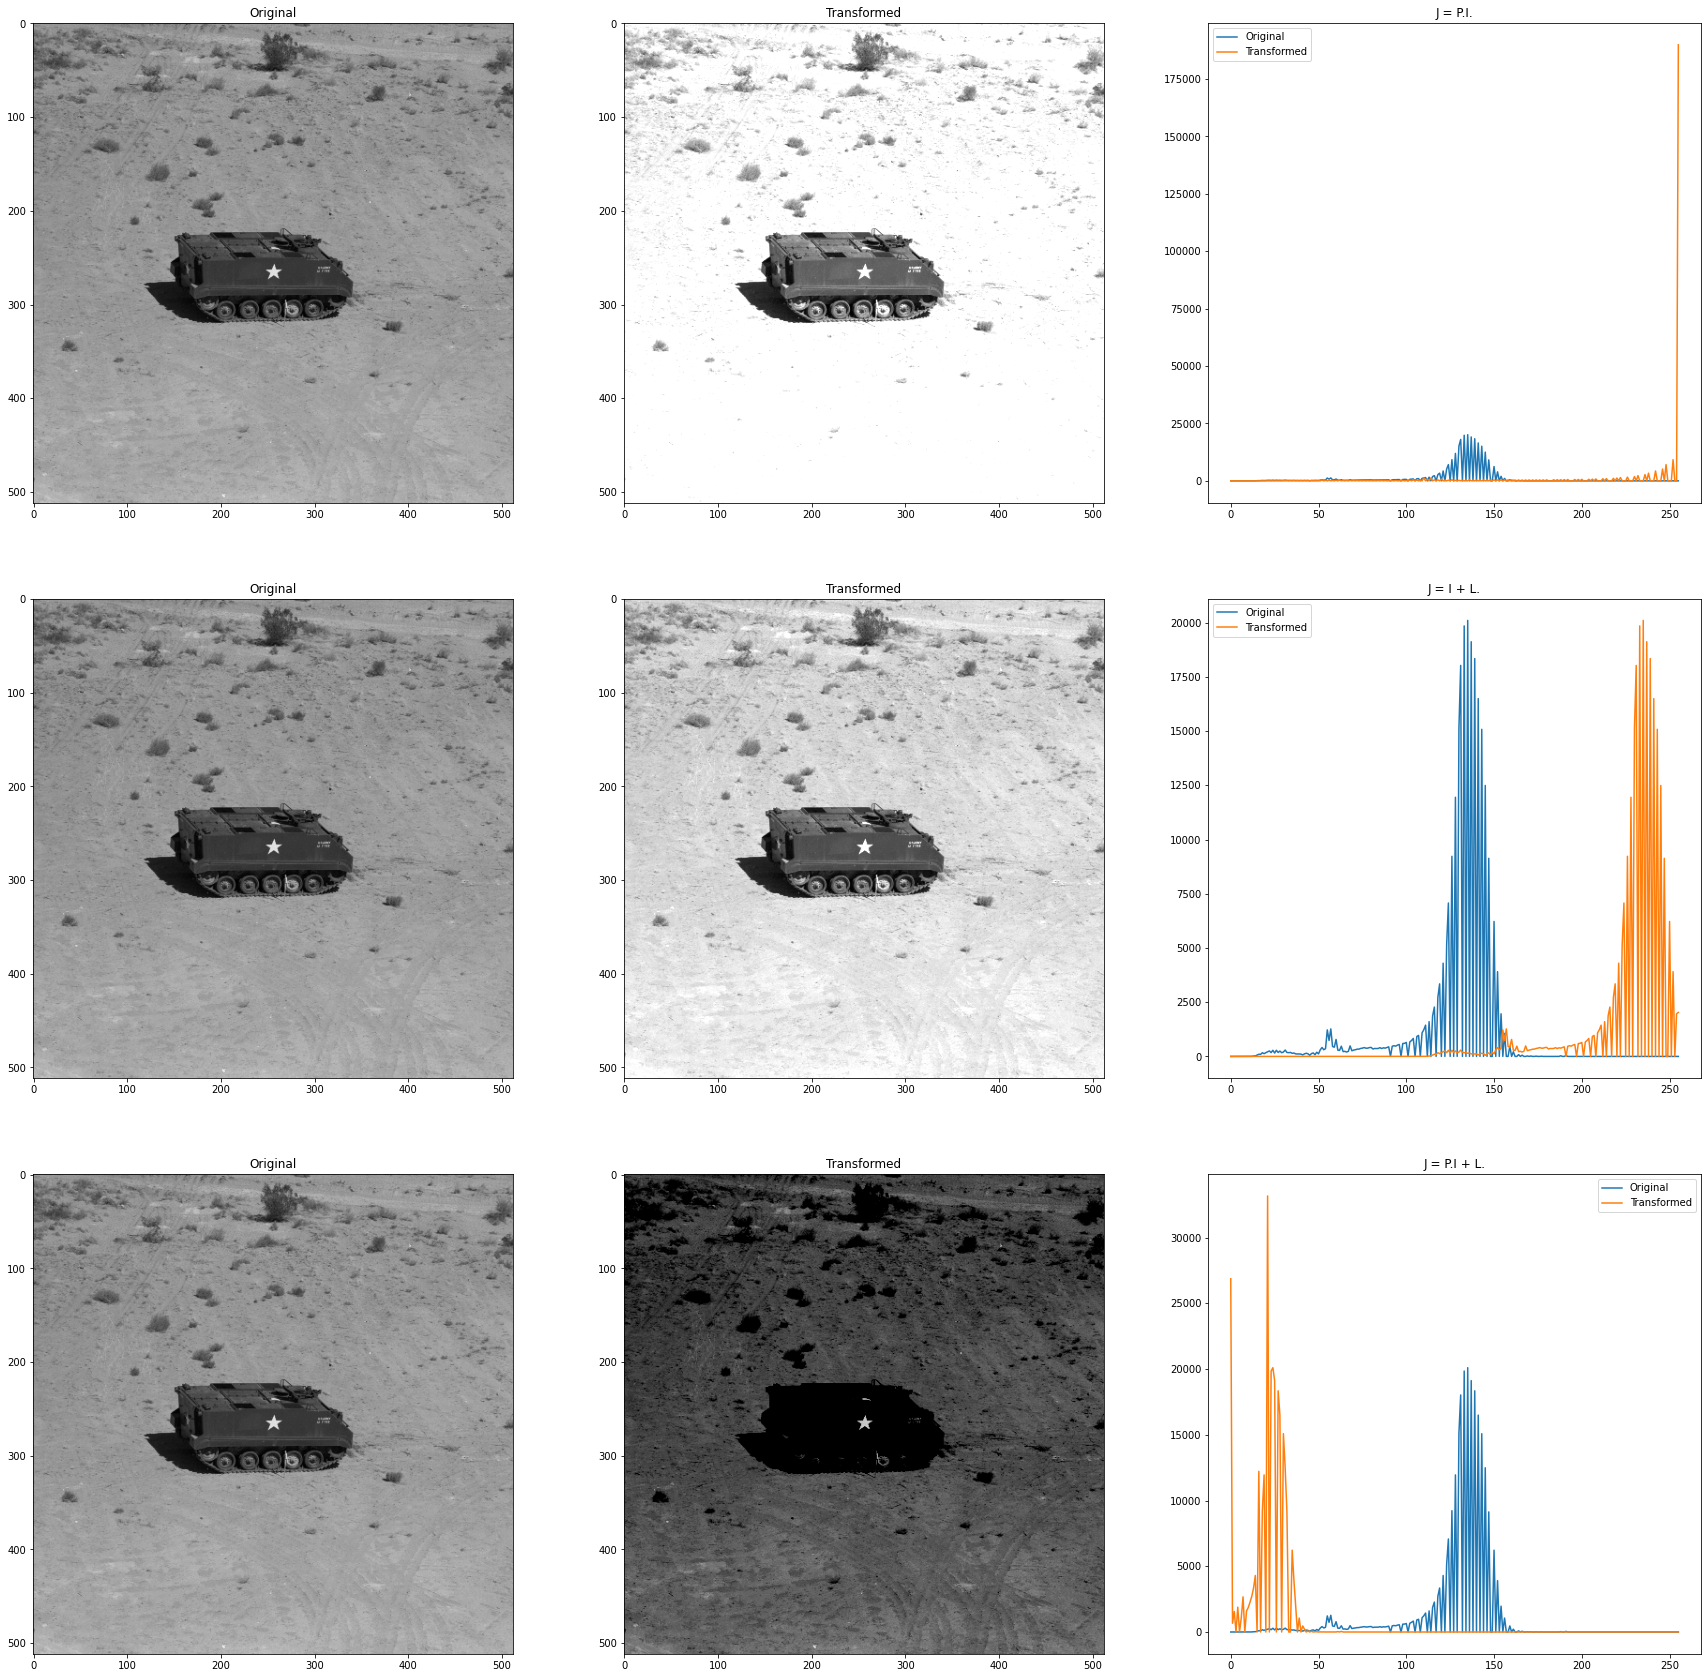

In [152]:
def histogram(img: list[list[int]]):
    colors = [0] * 256
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            colors[pixel] += 1
    return colors


f, axarr = plt.subplots(3, 3, figsize=(30, 30))

axarr[0, 0].imshow(APC, cmap="gray")
axarr[0, 0].title.set_text("Original")
axarr[0, 1].imshow(simpleLinearOperations(APC, P=2), cmap="gray")
axarr[0, 1].title.set_text("Transformed")
axarr[0, 2].plot(histogram(APC))
axarr[0, 2].plot(histogram(simpleLinearOperations(APC, P=2)))
axarr[0, 2].legend(["Original", "Transformed"])
axarr[0, 2].title.set_text("J = P.I.")

axarr[1, 0].imshow(APC, cmap="gray")
axarr[1, 0].title.set_text("Original")
axarr[1, 1].imshow(simpleLinearOperations(APC, L=100), cmap="gray")
axarr[1, 1].title.set_text("Transformed")
axarr[1, 2].plot(histogram(APC))
axarr[1, 2].plot(histogram(simpleLinearOperations(APC, L=100)))
axarr[1, 2].legend(["Original", "Transformed"])
axarr[1, 2].title.set_text("J = I + L.")

axarr[2, 0].imshow(APC, cmap="gray")
axarr[2, 0].title.set_text("Original")
axarr[2, 1].imshow(simpleLinearOperations(APC, P=0.7, L=-70), cmap="gray")
axarr[2, 1].title.set_text("Transformed")
axarr[2, 2].plot(histogram(APC))
axarr[2, 2].plot(histogram(simpleLinearOperations(APC, P=0.7, L=-70)))
axarr[2, 2].legend(["Original", "Transformed"])
axarr[2, 2].title.set_text("J = P.I + L.")


### 2.2 Full Scale Contrast Stretching

- Find min and max pixel values of a K level image. Say A is min and B is max.
- Apply I:J(i,j) = P.I(i,j) + L
- P.A + L = 0
- P.B + L = K-1
- => P = (K-1)/(B-A)
- => L = -A\*P


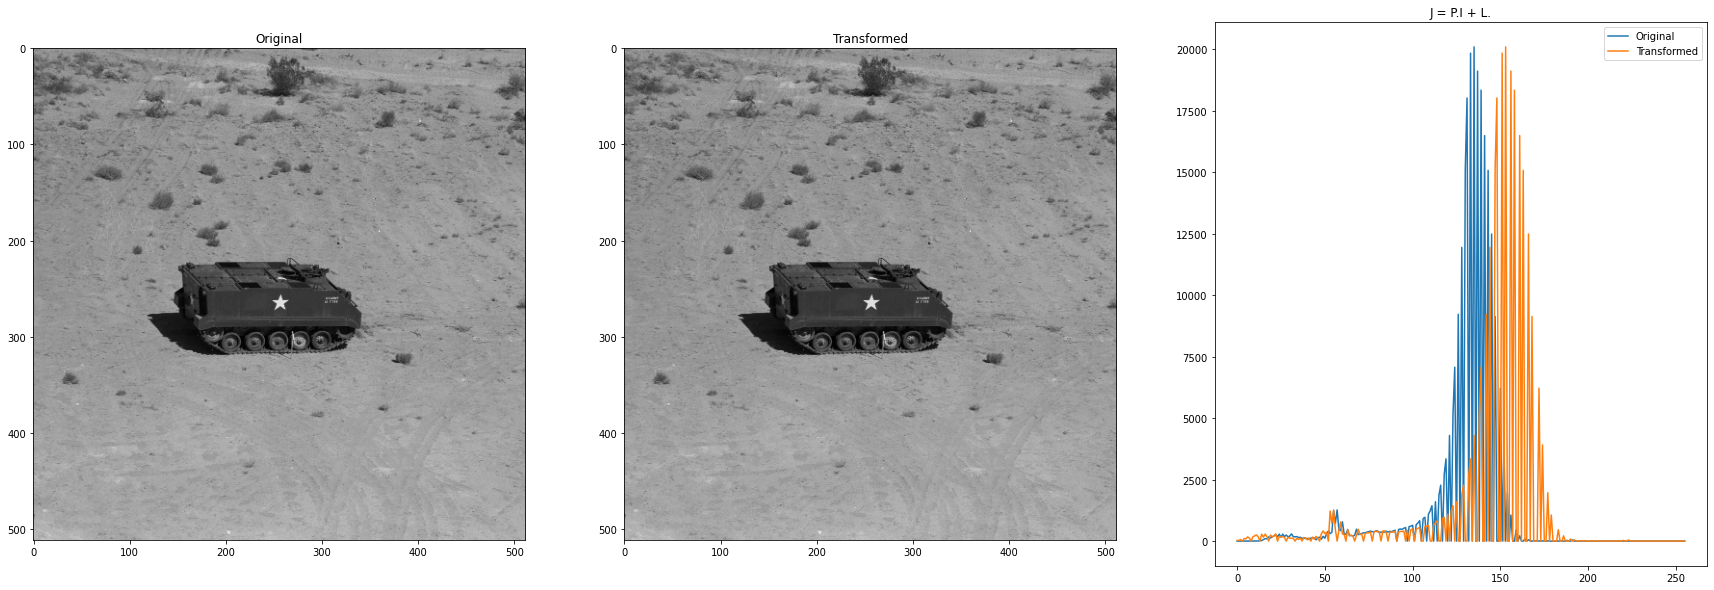

In [153]:
def findMinMaxAndK(img: list[list[int]]):
    maxVal = img[0][0]
    minVal = img[0][0]
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            if pixel > maxVal:
                maxVal = pixel
            if pixel < minVal:
                minVal = pixel
    bitsNeeded = math.ceil(math.log2(maxVal - minVal))
    return minVal, maxVal, (2 ** bitsNeeded)


def FullScaleContrastStretching(img: list[list[int]]):
    A, B, K = findMinMaxAndK(img)
    P: float = float(K - 1) / float(B - A)
    L = -1 * A * P
    return simpleLinearOperations(img, P=P, L=L)


def FSCS(img):  # Alias for later use
    return FullScaleContrastStretching(img)


f, axarr = plt.subplots(1, 3, figsize=(30, 10))

axarr[0].imshow(APC, cmap="gray")
axarr[0].title.set_text("Original")
axarr[1].imshow(FullScaleContrastStretching(APC), cmap="gray")
axarr[1].title.set_text("Transformed")
axarr[2].plot(histogram(APC))
axarr[2].plot(histogram(FullScaleContrastStretching(APC)))
axarr[2].legend(["Original", "Transformed"])
axarr[2].title.set_text("J = P.I + L.")


### 2.3 Log Magnitude Compression

- J(i,j) = log(1 + I(i,j))


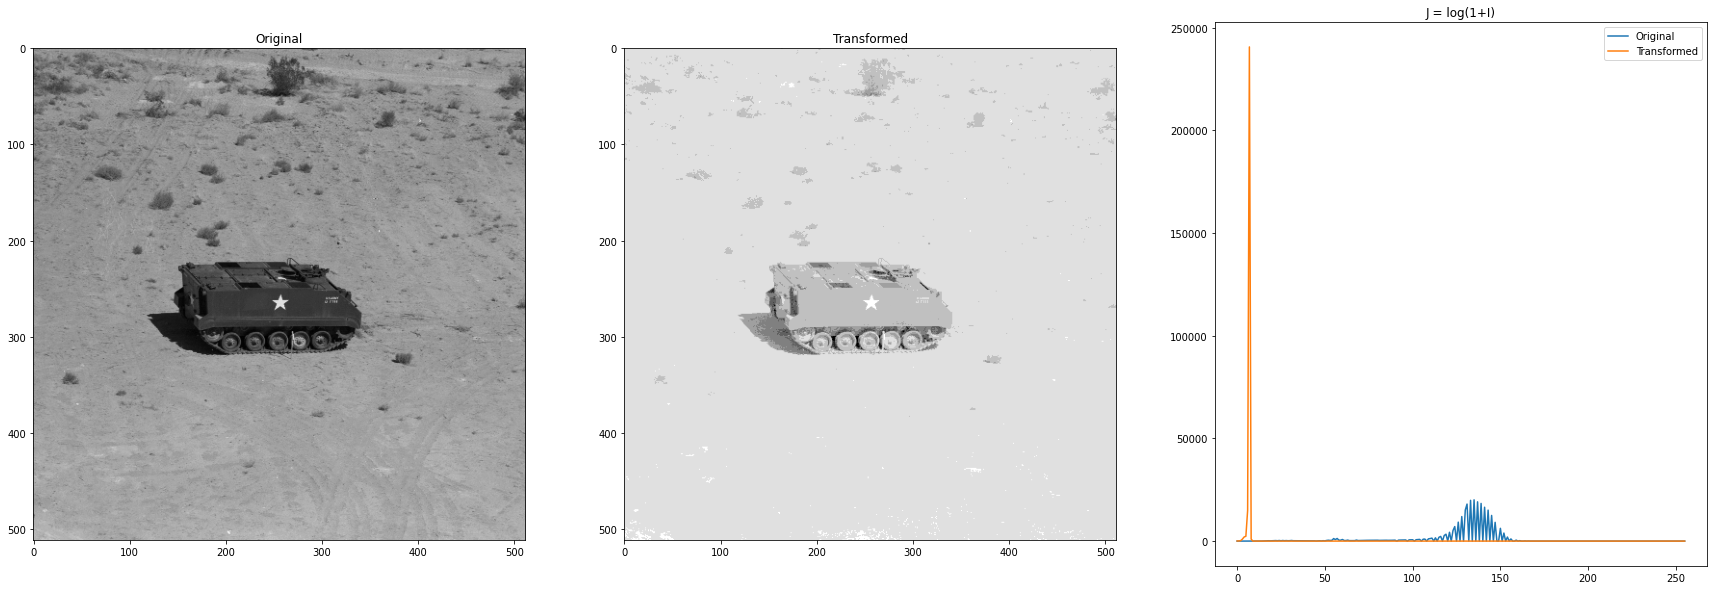

In [154]:
def LogMagnitudeCompression(img: list[list[int]]) -> list[list[int]]:
    r = FSCS(img)
    for (i, row) in enumerate(r):
        for (j, pixel) in enumerate(row):
            if pixel != 0:
                r[i][j] = int(round(math.log2(pixel)))
            else:
                r[i][j] = 0
    return r


def LMC(img):
    return LogMagnitudeCompression(img)


f, axarr = plt.subplots(1, 3, figsize=(30, 10))

axarr[0].imshow(APC, cmap="gray")
axarr[0].title.set_text("Original")
axarr[1].imshow(LMC(APC), cmap="gray")
axarr[1].title.set_text("Transformed")
axarr[2].plot(histogram(APC))
axarr[2].plot(histogram(LMC(APC)))
axarr[2].legend(["Original", "Transformed"])
axarr[2].title.set_text("J = log(1+I)")


### 2.4 Gamma Correction

- J = I^γ


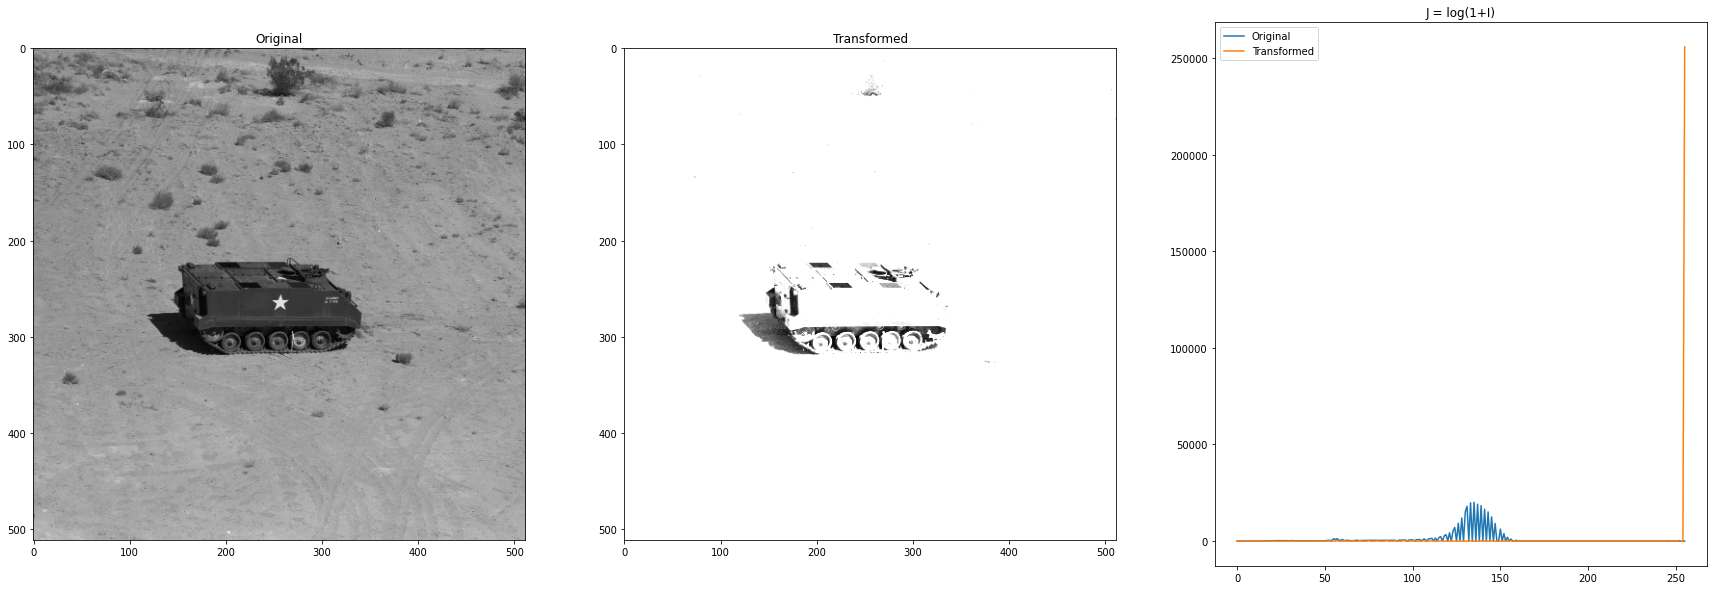

In [155]:
def GammaCorrection(img: list[list[int]], gamma: float):
    r = deepcopy(img)
    for (i, row) in enumerate(r):
        for (j, pixel) in enumerate(row):
            r[i][j] = min(int(pixel ** gamma), 255)
    return r


def GammaC(img, gamma=1.4):
    return GammaCorrection(img, gamma)


f, axarr = plt.subplots(1, 3, figsize=(30, 10))

axarr[0].imshow(APC, cmap="gray")
axarr[0].title.set_text("Original")
axarr[1].imshow(GammaC(APC), cmap="gray")
axarr[1].title.set_text("Transformed")
axarr[2].plot(histogram(APC))
axarr[2].plot(histogram(GammaC(APC)))
axarr[2].legend(["Original", "Transformed"])
axarr[2].title.set_text("J = log(1+I)")


### 2.5 Histogram Flattening


## 2. Favorite images from NASA's repository of images


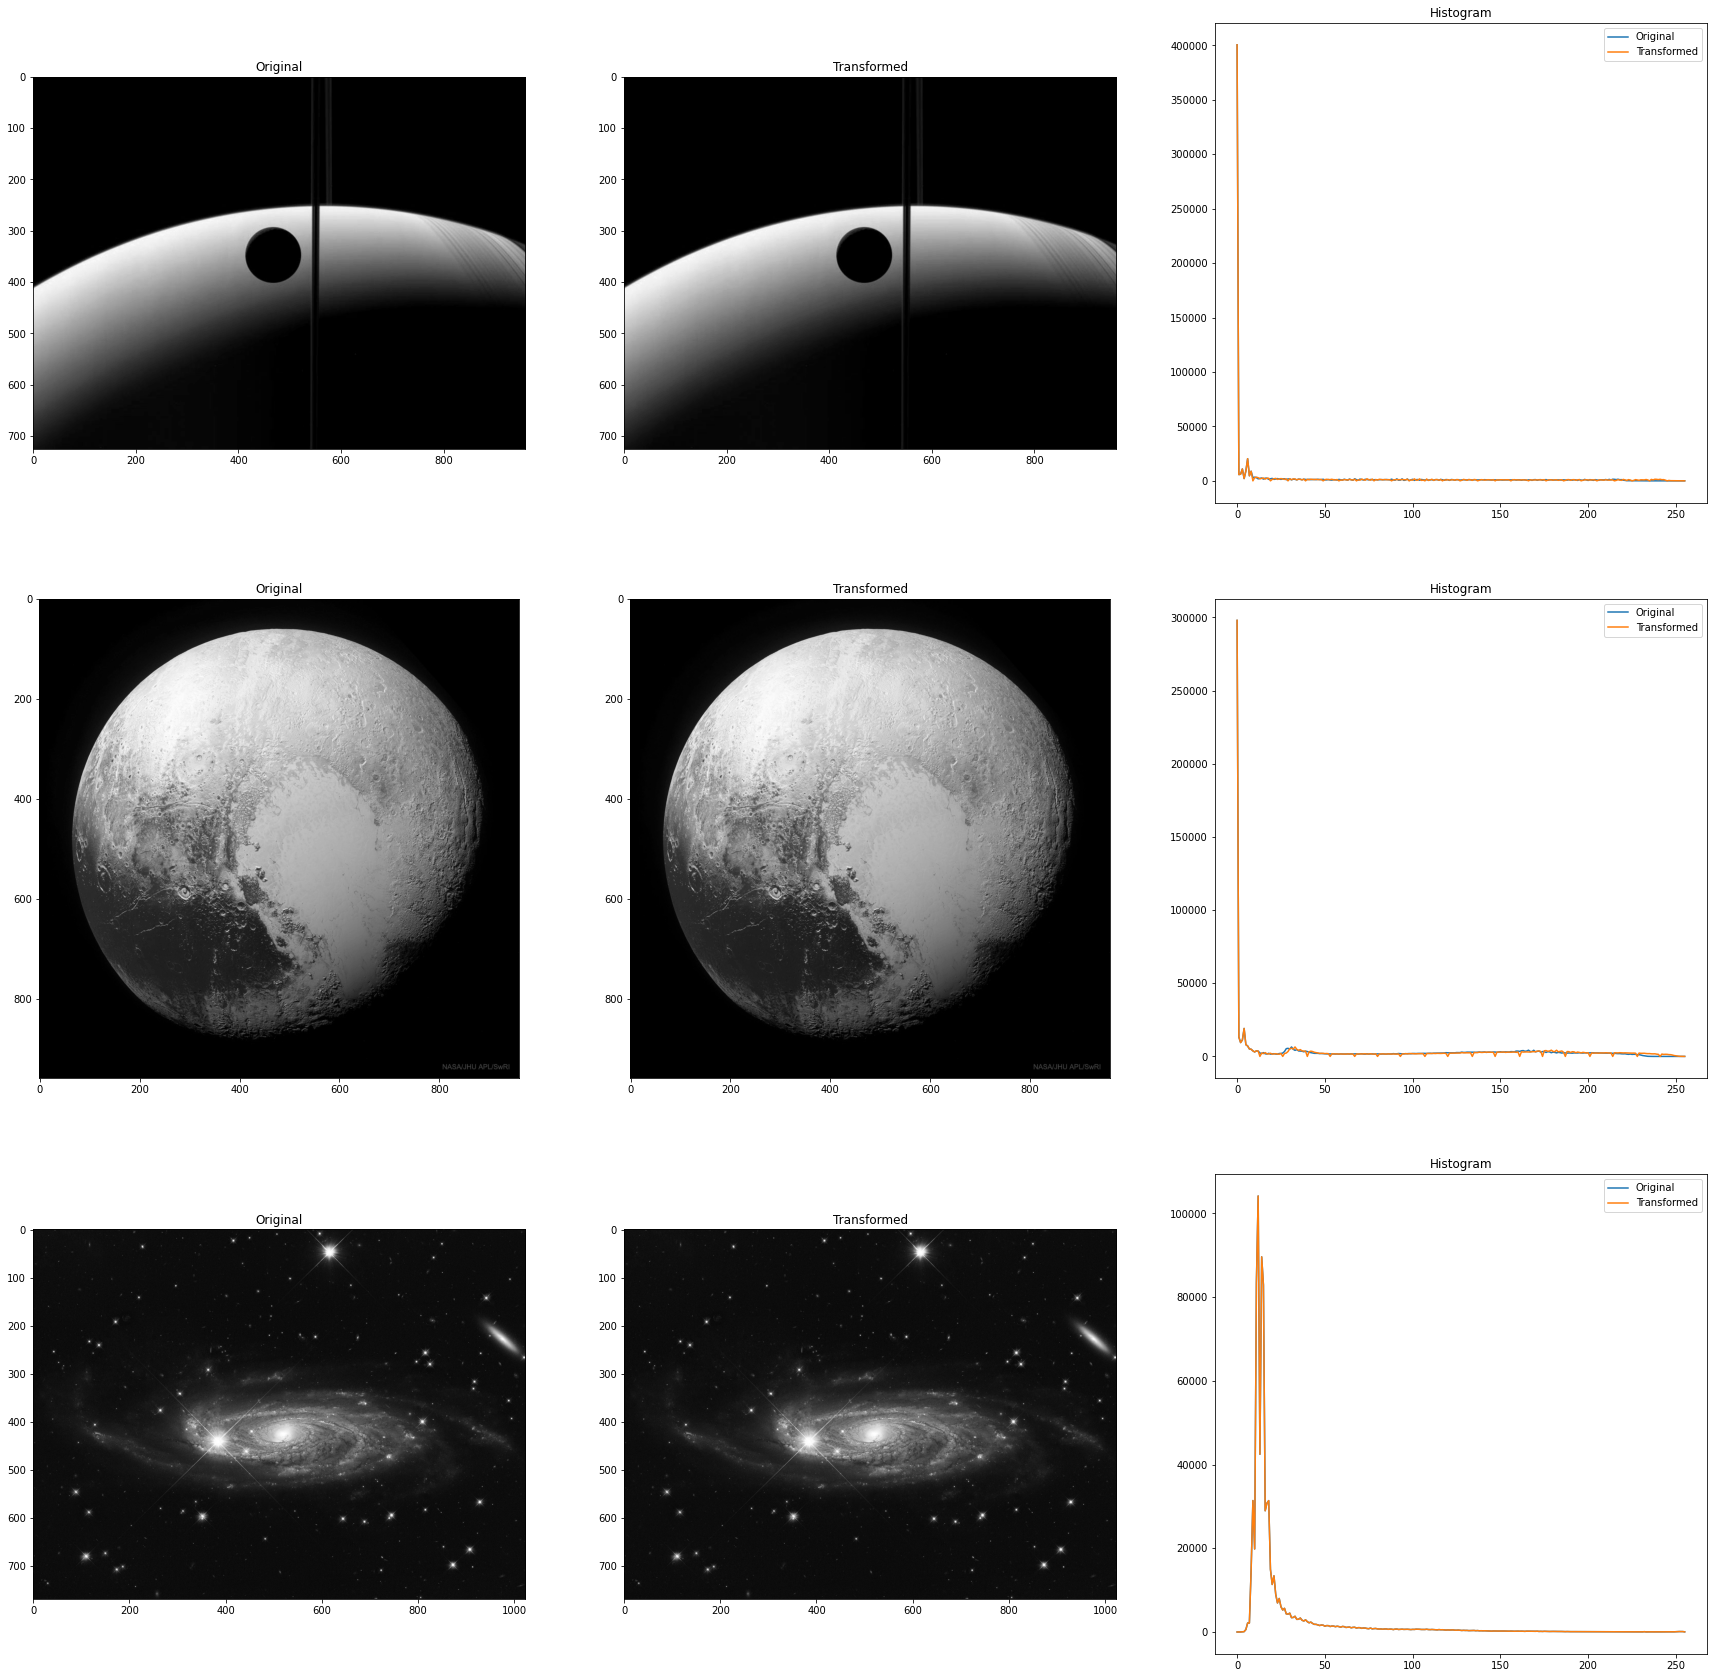

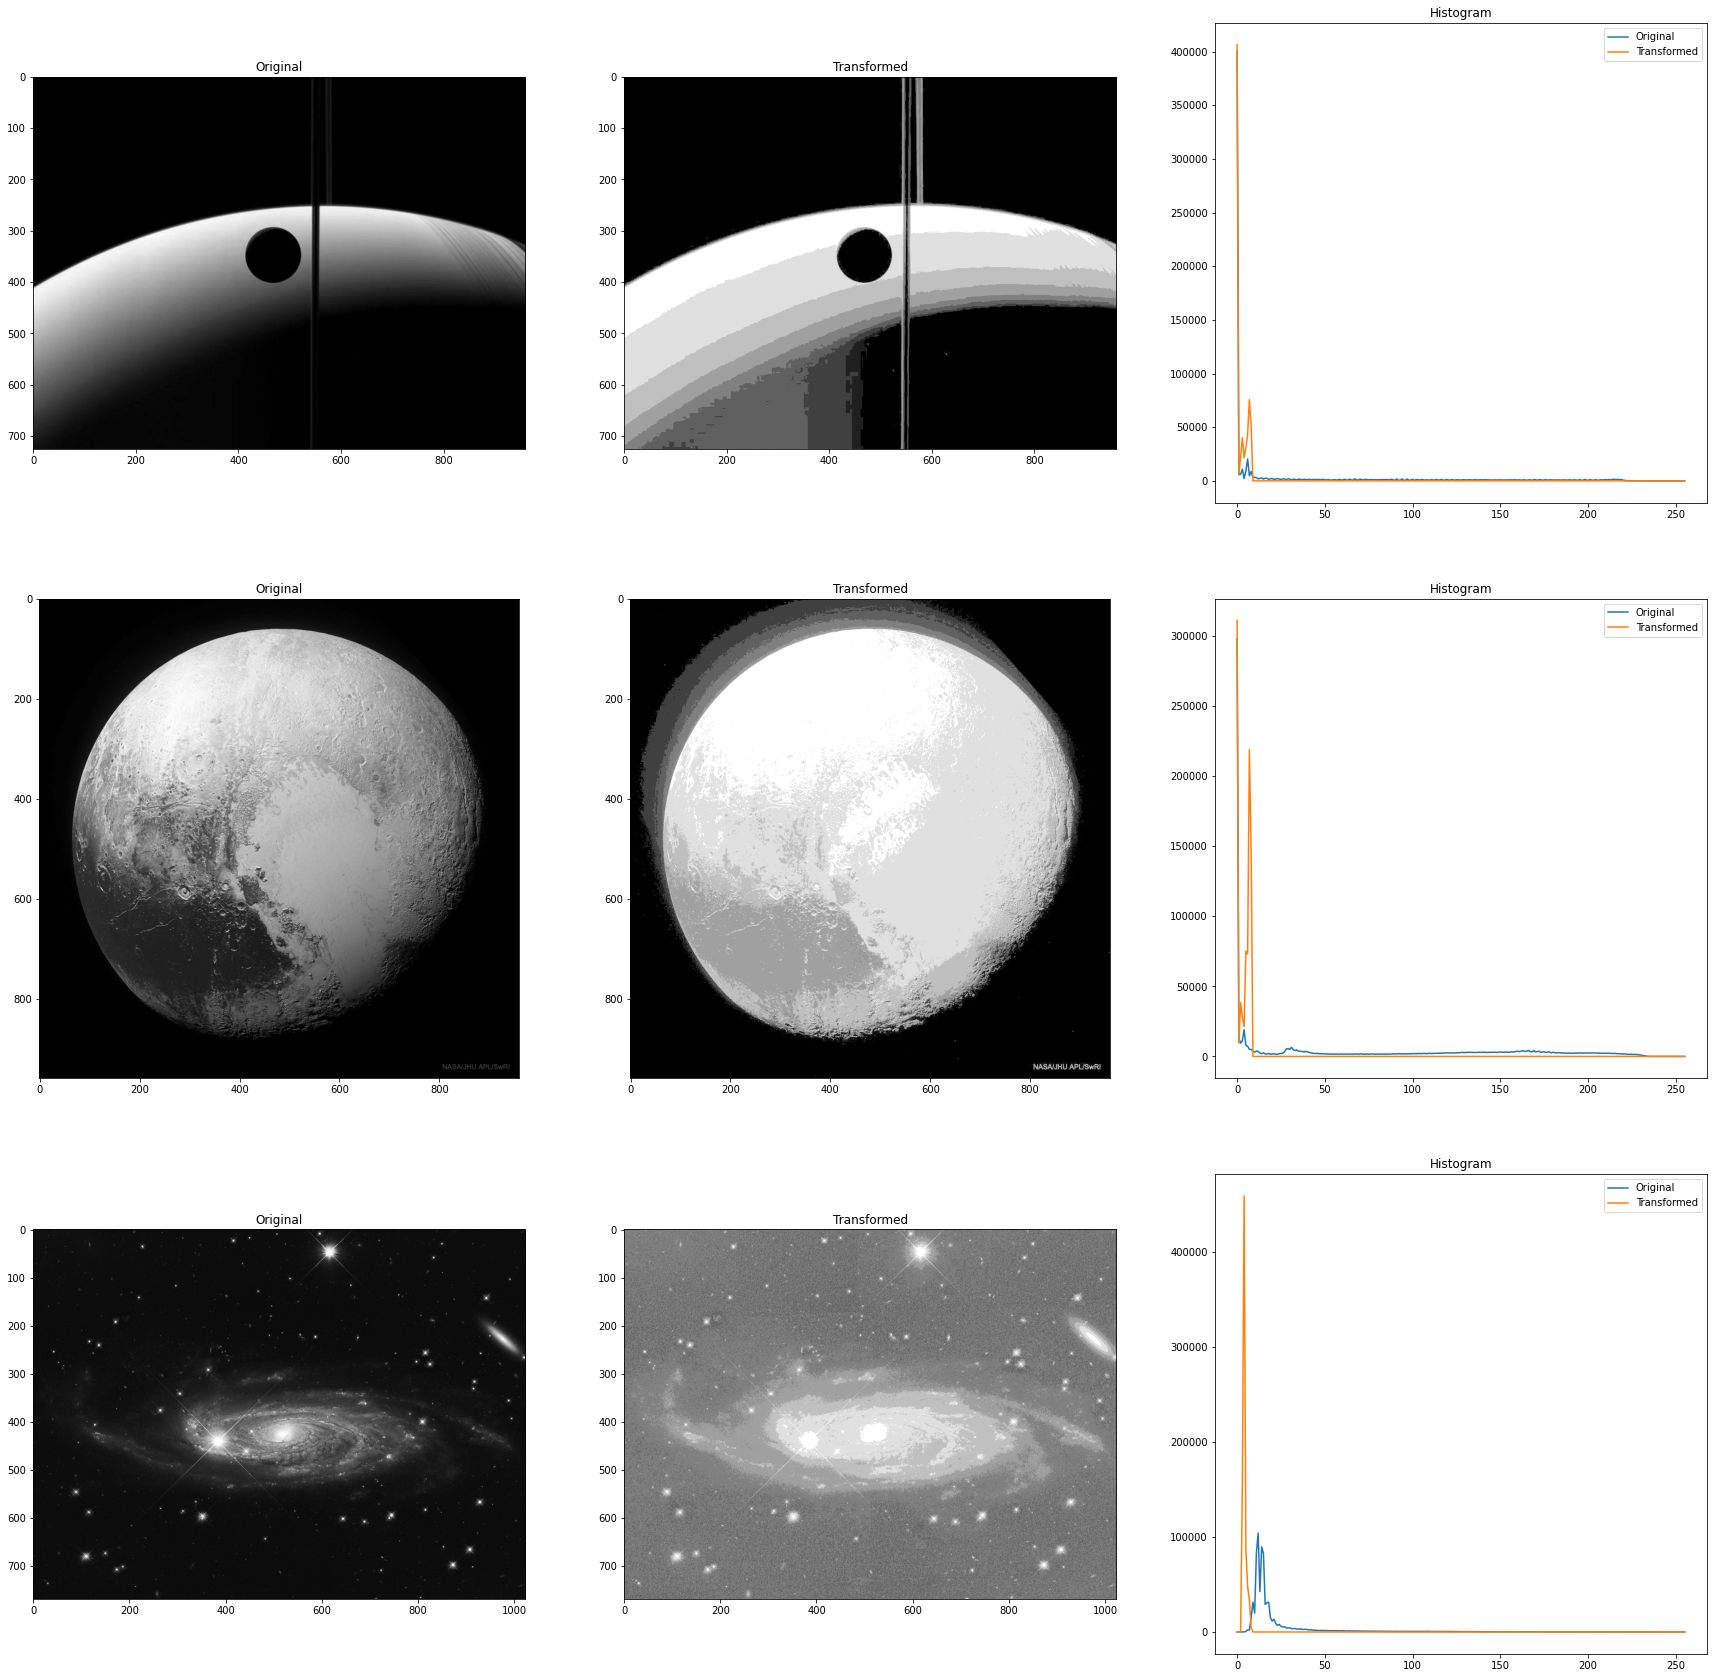

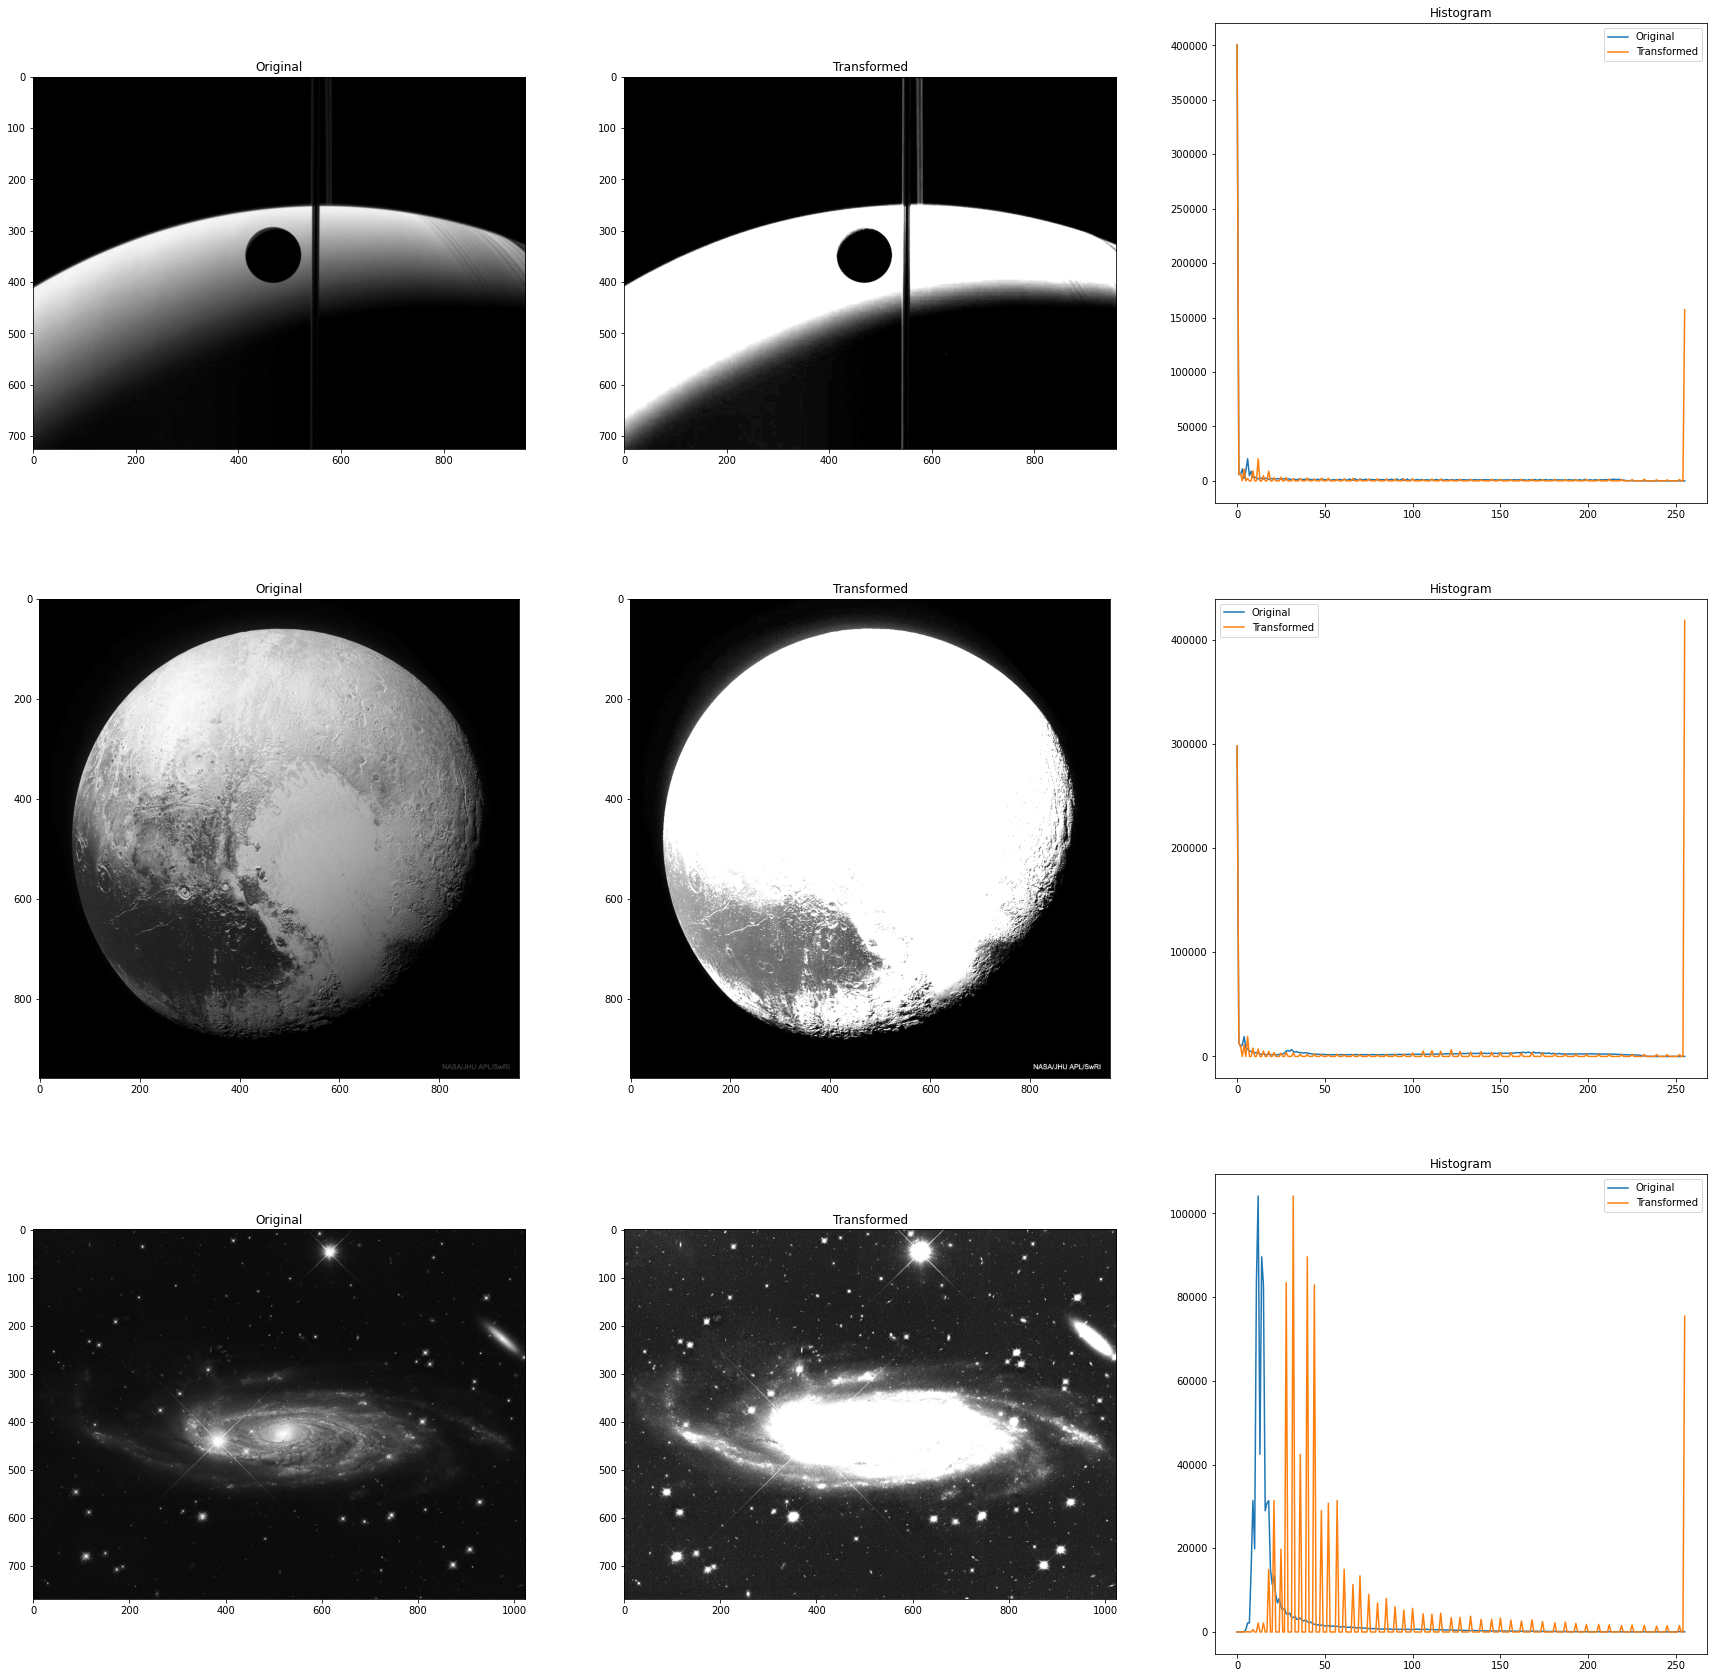

In [156]:
# A function to get a black and white image of a color image
def colorToGray(img: list[list[(int, int, int)]], color: str = "all"):
    r = np.zeros(shape=(len(img), len(img[0])))
    for (i, row) in enumerate(r):
        for (j, _) in enumerate(row):
            if color == "red":
                r[i][j] = img[i][j][0]
            elif color == "green":
                r[i][j] = img[i][j][1]
            elif color == "blue":
                r[i][j] = img[i][j][2]
            elif color == "all":
                r[i][j] = (
                    int(img[i][j][0] / 3)
                    + int(img[i][j][1] / 3)
                    + int(img[i][j][2] / 3)
                )
    return r


SaturnRHEA = colorToGray(mpimg.imread("saturnrhea_cassini_960.jpg"))
PlutoEnhanced = colorToGray(mpimg.imread("PlutoEnhancedHiRes_NewHorizons_960.jpg"))
RubinsGalaxy = colorToGray(mpimg.imread("RubinsGalaxy_hst1024.jpg"))

images = [SaturnRHEA, PlutoEnhanced, RubinsGalaxy]


def histogram(img: list[list[int]]):
    colors = [0] * 256
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            colors[int(pixel)] += 1
    return colors


def printImageDetails(images: list[np.ndarray], function: callable):
    f, axarr = plt.subplots(len(images), 3, figsize=(30, len(images) * 10))
    if len(images) == 1:
        axarr[0].imshow(APC, cmap="gray")
        axarr[0].title.set_text("Original")
        axarr[1].imshow(GammaC(APC), cmap="gray")
        axarr[1].title.set_text("Transformed")
        axarr[2].plot(histogram(APC))
        axarr[2].plot(histogram(GammaC(APC)))
        axarr[2].legend(["Original", "Transformed"])
        axarr[2].title.set_text("Histogram")
    else:
        for (i, img) in enumerate(images):
            axarr[i, 0].imshow(img, cmap="gray")
            axarr[i, 0].title.set_text("Original")
            axarr[i, 1].imshow(function(img), cmap="gray")
            axarr[i, 1].title.set_text("Transformed")
            axarr[i, 2].plot(histogram(img))
            axarr[i, 2].plot(histogram(function(img)))
            axarr[i, 2].legend(["Original", "Transformed"])
            axarr[i, 2].title.set_text("Histogram")


printImageDetails(images, FSCS)
printImageDetails(images, LMC)
printImageDetails(images, GammaC)


---


## 3. Image Zooming


### 3.1 Nearest Neighbour Interpolation


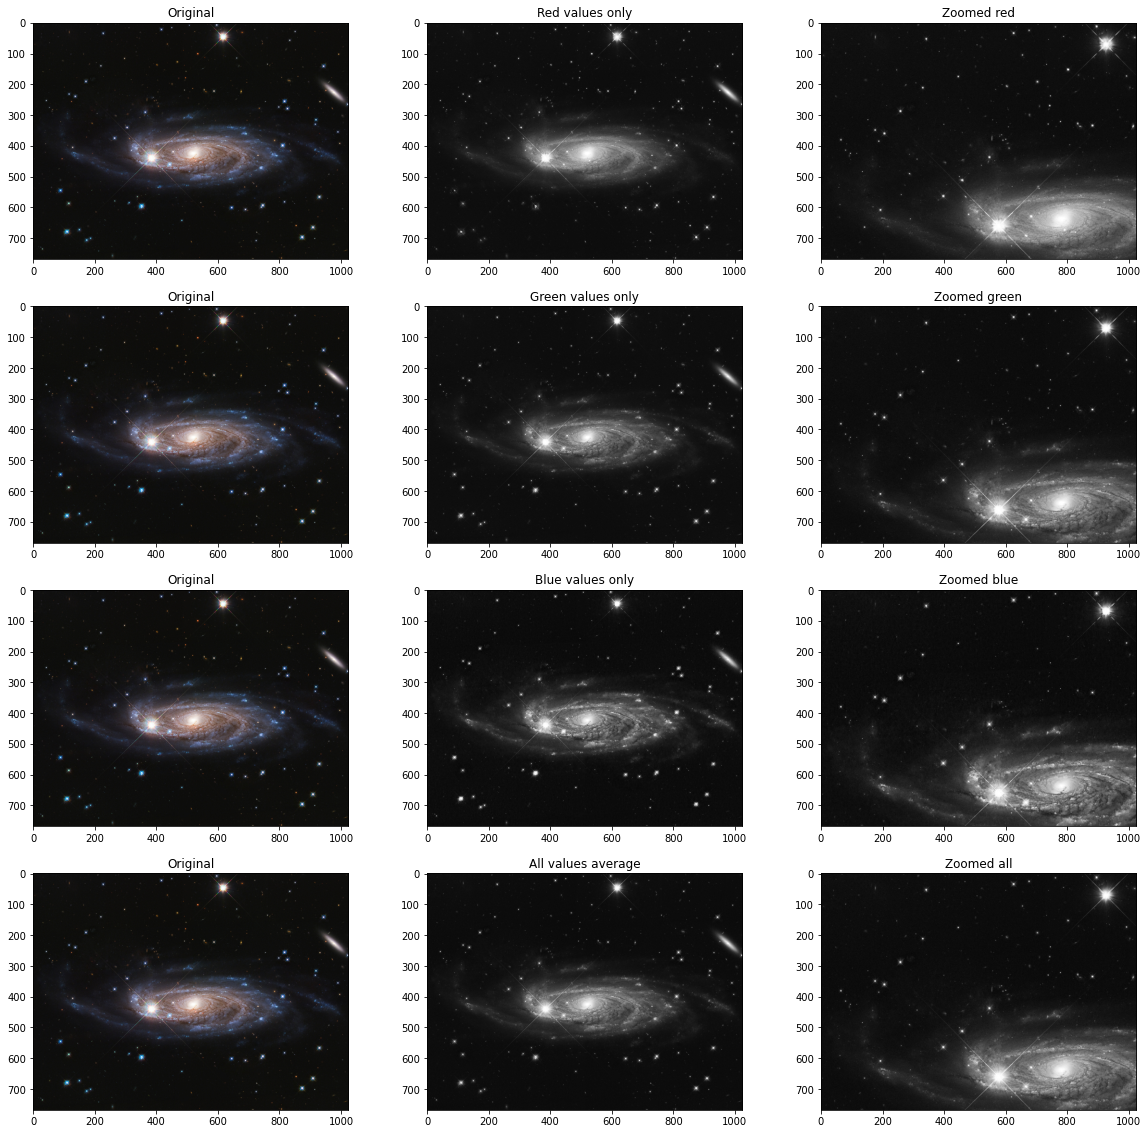

In [157]:
# Zooming using Nearest Neighbour interpolation
def ZoomImage(img: list[list[int]], zoom: float):
    r = deepcopy(img)
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            # For each pixel, find the closest pixel in the original image and copy it to the new image
            r[i][j] = img[int(round(i / zoom))][int(round(j / zoom))]
        for (j, pixel) in enumerate(row):
            if (i * zoom) < len(r) and (j * zoom) < len(r[0]):
                r[int(i * zoom)][int(j * zoom)] = pixel
    return r


RubinsGalaxy = mpimg.imread("RubinsGalaxy_hst1024.jpg")

f, axarr = plt.subplots(4, 3, figsize=(20, 20))

axarr[0, 0].imshow(RubinsGalaxy)
axarr[0, 0].title.set_text("Original")
axarr[0, 1].imshow(colorToGray(RubinsGalaxy, "red"), cmap="gray")
axarr[0, 1].title.set_text("Red values only")
axarr[0, 2].imshow(ZoomImage(colorToGray(RubinsGalaxy, "red"), 1.5), cmap="gray")
axarr[0, 2].title.set_text("Zoomed red")

axarr[1, 0].imshow(RubinsGalaxy)
axarr[1, 0].title.set_text("Original")
axarr[1, 1].imshow(colorToGray(RubinsGalaxy, "green"), cmap="gray")
axarr[1, 1].title.set_text("Green values only")
axarr[1, 2].imshow(ZoomImage(colorToGray(RubinsGalaxy, "green"), 1.5), cmap="gray")
axarr[1, 2].title.set_text("Zoomed green")

axarr[2, 0].imshow(RubinsGalaxy)
axarr[2, 0].title.set_text("Original")
axarr[2, 1].imshow(colorToGray(RubinsGalaxy, "blue"), cmap="gray")
axarr[2, 1].title.set_text("Blue values only")
axarr[2, 2].imshow(ZoomImage(colorToGray(RubinsGalaxy, "blue"), 1.5), cmap="gray")
axarr[2, 2].title.set_text("Zoomed blue")

axarr[3, 0].imshow(RubinsGalaxy)
axarr[3, 0].title.set_text("Original")
axarr[3, 1].imshow(colorToGray(RubinsGalaxy, "all"), cmap="gray")
axarr[3, 1].title.set_text("All values average")
axarr[3, 2].imshow(ZoomImage(colorToGray(RubinsGalaxy, "all"), 1.5), cmap="gray")
axarr[3, 2].title.set_text("Zoomed all")


- Above, we can see that we get the most accurate image using the average of all pixel values instead of using a single color. Let us use only the average for further analysis.


### 3.2 Bilinear Interpolation Zooming

Bilinear Interpolation Zooming can be achieved using a simple formula.

```plaintext
matrix([
  [1, i0, j0, i0*j0],
  [1, i1, j1, i1*j1],
  [1, i2, j2, i2*j2],
  [1, i3, j3, i3*j3]
]).inverse() * vector([img[i0, j0], img[i1, j1], img[i2, j2], img[i3, j3]])

The resultant vector [A, B, C, D] can be used to find the new pixel value.
new_image[i][j] = A + B*i + C*j + D*i*j

Here, (i0,j0), (i1,j1), (i2,j2), (i3,j3) are the four closest points to (i,j)
```


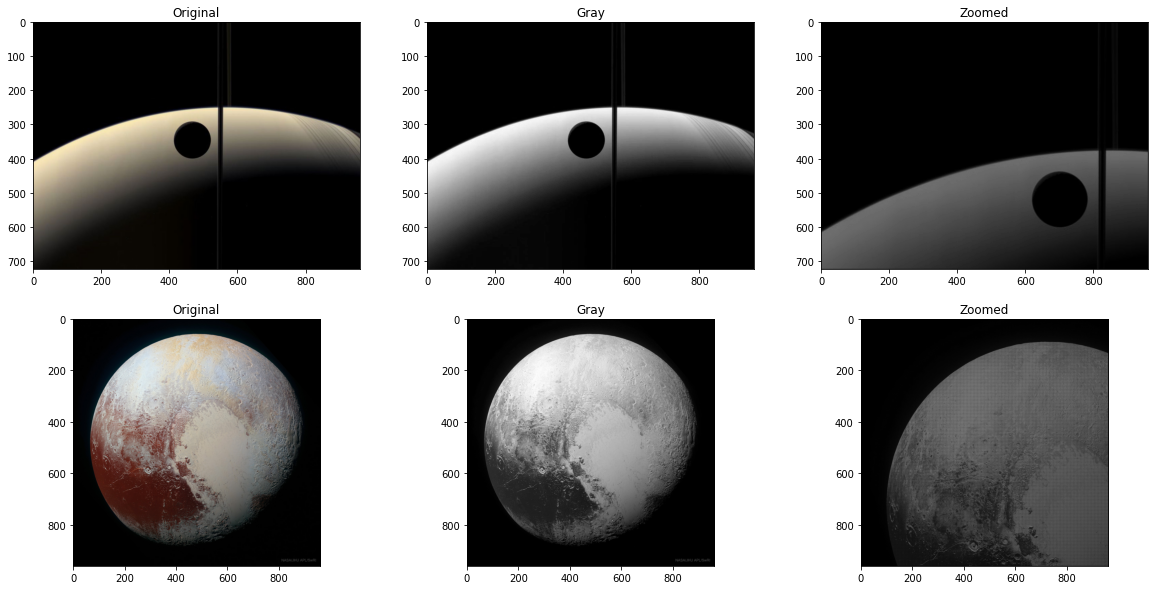

In [158]:
def BilinearInterpolationZoom(img: list[list[int]], zoom: float):
    r = deepcopy(img)
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            r[i][j] = 0
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            if (i * zoom) < len(r) and (j * zoom) < len(r[0]):
                r[int(i * zoom)][int(j * zoom)] = pixel
    for (ik, row) in enumerate(img):
        for (jk, pixel) in enumerate(row):
            if ik == 0 or jk == 0 or r[ik][jk] != 0:
                continue
            i = int(round(ik * zoom))
            j = int(round(jk * zoom))
            if i > len(r) - 1 or j > len(r[0]) - 1:
                continue
            mat: np.matrix = np.matrix(
                [
                    [1, i, j + 1, i * (j + 1)],
                    [1, i + 1, j, (i + 1) * j],
                    [1, i, j - 1, i * (j - 1)],
                    [1, i - 1, j, (i - 1) * j],
                ]
            )
            if np.linalg.det(mat) == 0:
                # r[i, j] = pixel
                continue
            abcd = (mat.I).dot(
                [img[i, j + 1], img[i + 1, j], img[i, j - 1], img[i - 1, j]]
            )

            r[i][j] = abcd[0] + abcd[1] * i + abcd[2] * j + abcd[3] * i * j
    return r


SaturnRHEA = mpimg.imread("saturnrhea_cassini_960.jpg")
PlutoEnhanced = mpimg.imread("PlutoEnhancedHiRes_NewHorizons_960.jpg")

f, axarr = plt.subplots(2, 3, figsize=(20, 10))

axarr[0, 0].imshow(SaturnRHEA)
axarr[0, 0].title.set_text("Original")
axarr[0, 1].imshow(colorToGray(SaturnRHEA, "all"), cmap="gray")
axarr[0, 1].title.set_text("Gray")
axarr[0, 2].imshow(
    BilinearInterpolationZoom(colorToGray(SaturnRHEA, "all"), 1.5), cmap="gray"
)
axarr[0, 2].title.set_text("Zoomed")

axarr[1, 0].imshow(PlutoEnhanced)
axarr[1, 0].title.set_text("Original")
axarr[1, 1].imshow(colorToGray(PlutoEnhanced, "all"), cmap="gray")
axarr[1, 1].title.set_text("Gray")
axarr[1, 2].imshow(
    BilinearInterpolationZoom(colorToGray(PlutoEnhanced, "all"), 1.5), cmap="gray"
)
axarr[1, 2].title.set_text("Zoomed")


- Comparing Nearest neighbor and bilinear interpolation, side-by-side below.


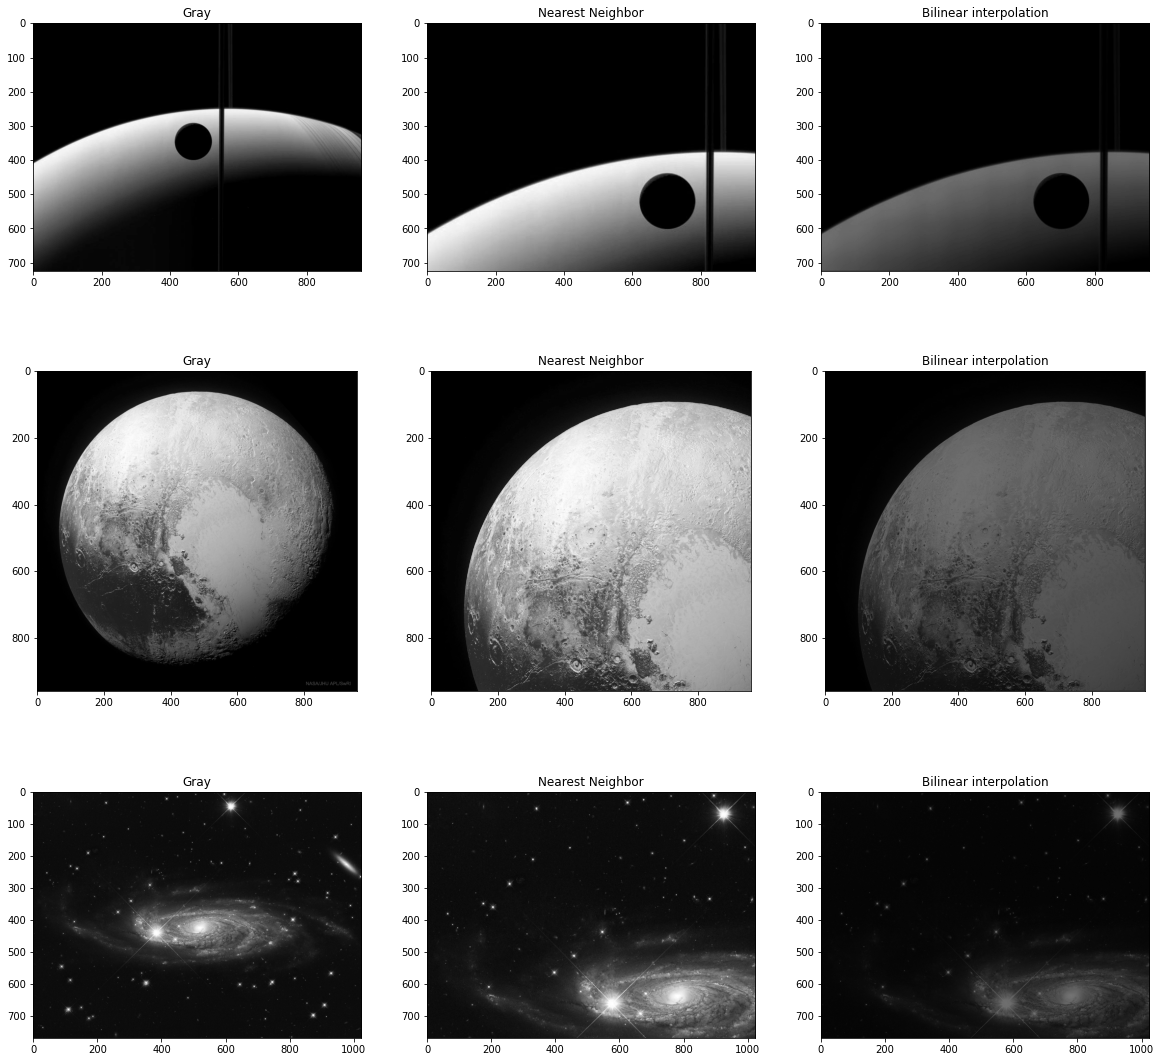

In [159]:
f, axarr = plt.subplots(3, 3, figsize=(20, 20))

axarr[0, 0].title.set_text("Gray")
axarr[0, 0].imshow(colorToGray(SaturnRHEA, "all"), cmap="gray")
axarr[0, 1].title.set_text("Nearest Neighbor")
axarr[0, 1].imshow(ZoomImage(colorToGray(SaturnRHEA, "all"), 1.5), cmap="gray")
axarr[0, 2].title.set_text("Bilinear interpolation")
axarr[0, 2].imshow(
    BilinearInterpolationZoom(colorToGray(SaturnRHEA, "all"), 1.5), cmap="gray"
)

axarr[1, 0].title.set_text("Gray")
axarr[1, 0].imshow(colorToGray(PlutoEnhanced, "all"), cmap="gray")
axarr[1, 1].title.set_text("Nearest Neighbor")
axarr[1, 1].imshow(ZoomImage(colorToGray(PlutoEnhanced, "all"), 1.5), cmap="gray")
axarr[1, 2].title.set_text("Bilinear interpolation")
axarr[1, 2].imshow(
    BilinearInterpolationZoom(colorToGray(PlutoEnhanced, "all"), 1.5), cmap="gray"
)

axarr[2, 0].title.set_text("Gray")
axarr[2, 0].imshow(colorToGray(RubinsGalaxy, "all"), cmap="gray")
axarr[2, 1].title.set_text("Nearest Neighbor")
axarr[2, 1].imshow(ZoomImage(colorToGray(RubinsGalaxy, "all"), 1.5), cmap="gray")
axarr[2, 2].title.set_text("Bilinear interpolation")
axarr[2, 2].imshow(
    BilinearInterpolationZoom(colorToGray(RubinsGalaxy, "all"), 1.5), cmap="gray"
)